**Introduction on Image Segmentation**

https://debuggercafe.com/introduction-to-image-segmentation-in-deep-learning/


[Cat & Dog]

https://editor.analyticsvidhya.com/uploads/70077Screenshot%20from%202022-04-10%2013-37-37.png

Suppose we have this image and the question that we are trying to solve is, what is the object present in this image. The object of importance here is the dog. Now, this looks like a simple enough problem, right?

This is an image classification problem. Now, instead of having a single object in the image, we can have multiple objects so our question would change accordingly.

Image Segmentation
That is, what are the objects present in the image? The answer to this would be a Dog and a Cat. This is a multi-class classification task. We can identify what objects are present in the image. We can build a bounding box around the objects.

In the above image, we find a Cat & a Dog. We built a red and blue box around them respectively. But what if the question is what is the location of each pixel of the found objects?

We can identify every pixel that represents the object. In simple words, instead of building a rough rectangular box around the object, we build a polygon around the object and color each pixel of that object.

https://www.analyticsvidhya.com/blog/2022/05/introduction-to-image-segmentation/

**Performance Evaluation Metrics for Image Segmentation in Deep Learning**
*Segmenting objects in images is alright, but how do we evaluate an image segmentation model?*

**Pixel Accuracy**
Pixel accuracy is the ratio of the pixels that are classified to the total number of pixels in the image. Suppose that there are K + 1 classes in an image where K is the number of all the object classes, and one is the background class.

Pixel Accuracy = $\frac{\sum_{i=0}^K p_{ii}} {\sum_{i=0}^K \sum_{i=1}^K p_{ij}}$

In the above equation, pij are the pixels which belong to class i and are predicted as class j.


**Mean Pixel Accuracy**
In mean pixel accuracy, the ratio of the correct pixels is computed in a per-class manner. Finally, the value is averaged over the total number of classes.

Mean Pixel Accuracy= $\frac{1}{K+1} \sum_{i=0}^K \frac{p_{ii}}{\sum_{i=0}^k p_{ij}}$



**Intersection over Union (IoU) and Mean-IoU**
IoU or otherwise known as the **Jaccard Index** is used for both object detection and image segmentation. It is the fraction of area of intersection of the predicted segmentation of map and the ground truth map, to the area of union of predicted and ground truth segmentation maps.

The following is the formula.

IoU= $\frac{\mid A\cap B \mid}{\mid A\cup B \mid}$


In the above formula, A and B are the predicted and ground truth segmentation maps respectively.

Coming to **Mean IoU**, it is perhaps one of the most widely used metric in code implementations and research paper implementations. It is the average of the IoU over all the classes.



**Dice Coefficient and Dice Loss**
The Dice coefficient is another popular evaluation metric in many modern research paper implementations of image segmentation.

It is a little it similar to the IoU metric. It is defined as the ratio of the twice the intersection of the predicted and ground truth segmentation maps to the total area of both the segmentation maps.

\begin{align}
DiceCoefficient= 2 *\frac{\mid A\cap B \mid}{\mid A\mid + \mid B \mid}
\end{align} 
Another metric that is becoming popular nowadays is the Dice Loss. Along with being a performance evaluation metric is also being used as the loss function while training the algorithm. For now, we will not go into much detail of the dice loss function. It is basically 1 – Dice Coefficient along with a few tweaks. The following is the formula.

\begin{align} Dice Loss=1 -2 *\frac{\mid A\cap B \mid + smooth}{\mid A\mid + \mid B \mid + smooth} \end{align}
In the above function, the smooth constant has a few important functions. First of all, it avoids the division by zero error when calculating the loss. Secondly, in some particular cases, it can also reduce overfitting. 

**Fully Convolutional Networks for Image Segmentation**

* This image segmentation neural network model contains only convolutional layers and hence the name.
* The authors modified the GoogLeNet and VGG16 architectures by replacing the final fully connected layers with convolutional layers. This makes the network to output a segmentation map of the input image instead of the standard classification scores.

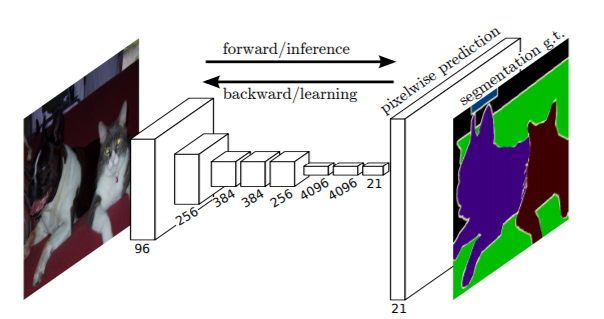




* The input is an RGB image and the output is a segmentation map.









**SegNet**


SegNet by Badrinarayanan et al. is a deep learning segmentation model based on the encoder-decoder architecture.
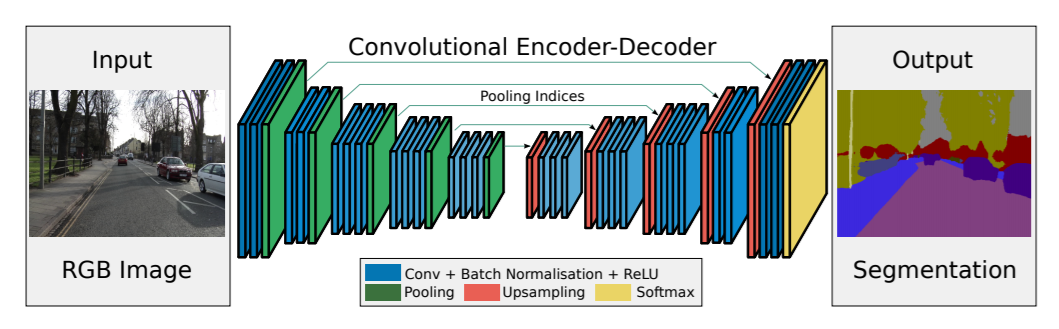

*  You can see that the trainable encoder network has 13 convolutional layers. These are the layers in the VGG16 network. The decoder network contains upsampling layers and convolutional layers. This decoder network is responsible for the pixel-wise classification of the input image and outputting the final segmentation map.

**U-Net**

U-Net by Ronneberger et al. is another segmentation model based on the encoder-decoder architecture.

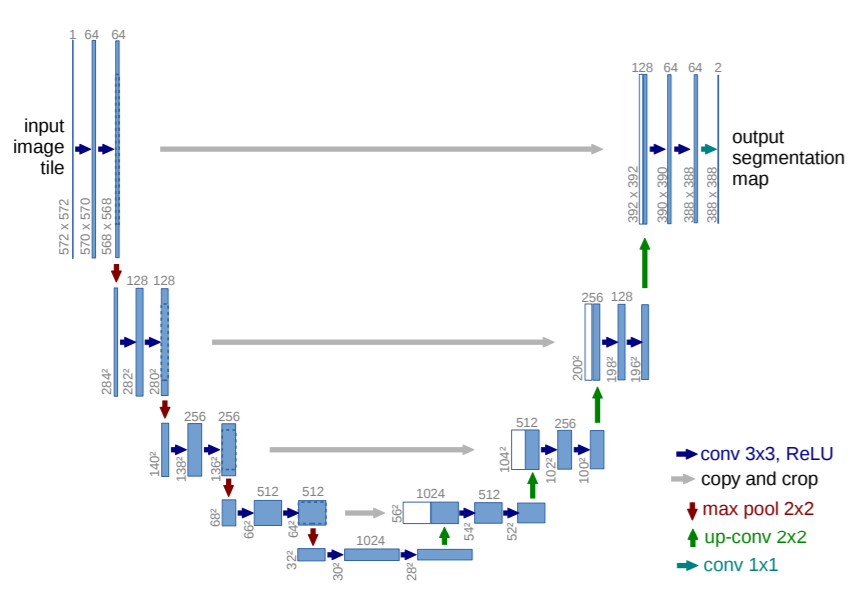

The U-Net mainly aims at segmenting medical images using deep learning techniques. The U-Net architecture comprises of two parts. One is the down-sampling network part that is an FCN-like network. The other one is the up-sampling part which increases the dimensions after each layer. This increase in dimensions leads to higher resolution segmentation maps which are a major requirement in medical imaging.

**Mask-RCNN**

The Mask-RCNN architecture for image segmentation is an extension of the Faster-RCNN object detection framework. The paper by Kaiming He, Georgia Gkioxari, Piotr Dollar, and Ross Girshick extends the Faster-RCNN object detector model to output both image segmentation masks and bounding box predictions as well.

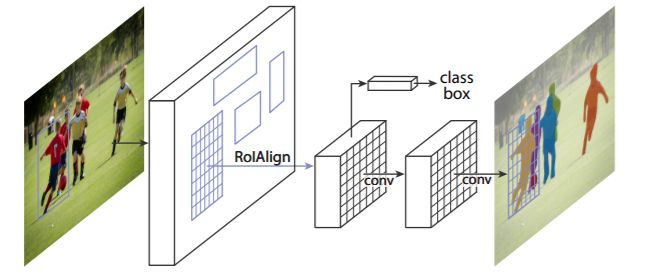

The Mask-RCNN architecture contains *three output branches*. These include the branches for the **bounding box coordinates, the output classes, and the segmentation map**. The Mask-RCNN model combines the losses of all the three and trains the network jointly. 

## **Region-based Segmentation**

One simple way to segment different objects could be to use their pixel values. An important point to note – the pixel values will be different for the objects and the image’s background if there’s a sharp contrast between them.

In this case, we can set a threshold value. The pixel values falling below or above that threshold can be classified accordingly (as an object or the background). This technique is known as **Threshold Segmentation**.

If we want to divide the image into two regions (object and background), we define a single threshold value. This is known as the **global threshold**.

 

If we have multiple objects along with the background, we must define multiple thresholds. These thresholds are collectively known as the **local threshold**.

**how does image segmentation work?**

An image is a collection or set of different pixels. We group together the pixels that have similar attributes using image segmentation.

Object detection builds a bounding box corresponding to each class in the image. But it tells us nothing about the shape of the object. 

Image segmentation creates a pixel-wise mask for each object in the image. This technique gives us a far more granular understanding of the object(s) in the image.


**Why do we need Image Segmentation?**

When the shape of the objet to be detected matters, then OD fails and hence Image Segmentation. Like the shape of cancerous cells.

**The Different Types of Image Segmentation**



1.   Semantic Segmentation : Objects of the same class are masked with same colour.
2.   Instance  Segmentation: Different objects of same class are coloured differently.



In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(192, 263, 3)


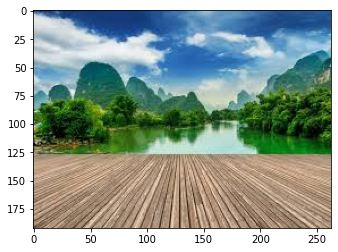

In [ ]:
image = plt.imread('1.jpeg')
print(image.shape)
plt.imshow(image)

In [ ]:
grey = rgb2gray(image)

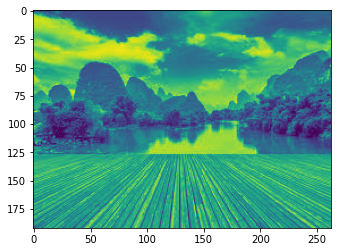

In [ ]:
plt.imshow(grey)

In [ ]:
grey.shape

(192, 263)

(192, 263)


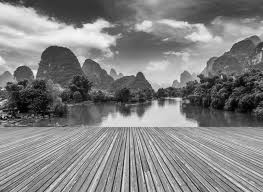

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('1.jpeg', cv2.IMREAD_UNCHANGED)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
cv2_imshow(gray)

**We will take the mean of the pixel values and use that as a threshold**. If the pixel value is more than our threshold, we can say that it belongs to an object. If the pixel value is less than the threshold, it will be treated as the background.

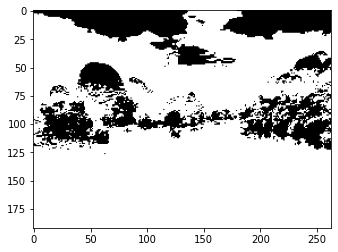

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

Nice! The darker region (black) represents the background and the brighter (white) region is the foreground. We can define multiple thresholds as well to detect multiple objects:

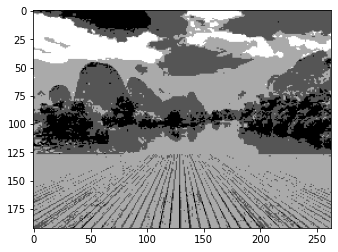

In [ ]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

**advantages of this method are:**

Calculations are simpler
Fast operation speed
When the object and background have high contrast, this method performs really well
But there are some **limitations** to this approach. When we don’t have significant grayscale difference, or there is an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments

## **Edge Detection Segmentation**

What divides two objects in an image? There is always an edge between two adjacent regions with different grayscale values (pixel values). ***The edges can be considered as the discontinuous local features of an image***.

We can make use of this discontinuity to detect edges and hence define a boundary of the object. This helps us in *detecting the shapes of multiple objects present in a given image*. Now the question is how can we detect these edges? This is where we can make use of **filters** and **convolutions**.

* Take the weight matrix
* Put it on top of the image
* Perform element-wise multiplication and get the output
* Move the weight matrix as per the stride chosen
* Convolve until all the pixels of the input are used

sobel operator: It is typically used to detect edges. The sobel operator has two weight matrices – one for detecting horizontal edges and the other for detecting vertical edges.

In [ ]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


Now, convolve this filter over the image using the convolve function of the ndimage package from scipy.

In [ ]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

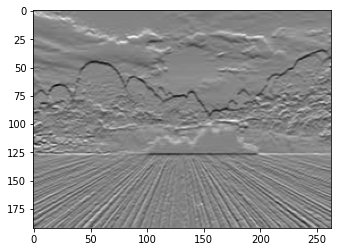

In [ ]:
plt.imshow(out_h, cmap='gray')

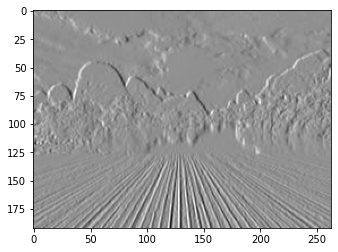

In [ ]:
plt.imshow(out_v, cmap='gray')

filter that can detect both horizontal and vertical edges at the same time. This is called the laplace operator:

In [ ]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


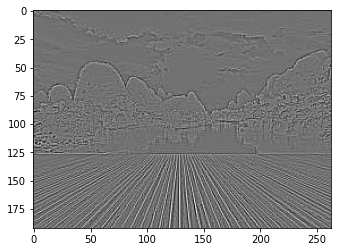

In [ ]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

# Image Segmentation based on Clustering

**Clustering** is the task of dividing the population (data points) into a number of groups, such that data points in the same groups are more similar to other data points in that same group than those in other groups. These groups are known as clusters.

One of the most commonly used clustering algorithms is **k-means**. Here, the k represents the number of clusters (not to be confused with k-nearest neighbor). Let’s understand how k-means works:

* 1 First, randomly select k initial clusters
* 2 Randomly assign each data point to any one of the k clusters
* 3 Calculate the centers of these clusters
* 4 Calculate the distance of all the points from the center of each cluster
* 5 Depending on this distance, the points are reassigned to the nearest cluster
* 6 Calculate the center of the newly formed clusters
* 7 Finally, repeat steps (4), (5) and (6) until either the center of the clusters does not change or we reach the set number of iterations

(192, 263, 3)


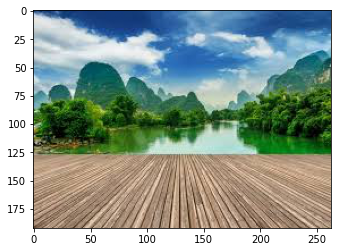

In [ ]:
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

It’s a 3-dimensional image of shape (192, 263, 3). For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels). In our example, this will be (192*263, 3).

In [ ]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape


(50496, 3)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

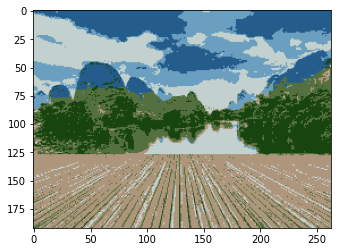

In [ ]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images).

It looks at all the samples at every iteration, so the time taken is too high.